<a href="https://colab.research.google.com/github/mjs1995/coding/blob/main/INF/cote_pr.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# BFS
- 시작점에 연결된 vertex 찾기
- 찾은 Vertex를 Queue에 저장
- Queue의 가장 먼저 것 뽑아서 반복

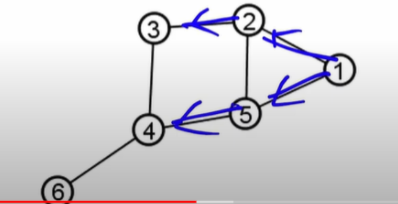

- 1,2,5,3,4
- BFS는 Queue / DFS는 Stack

## 백준 1926_그림

In [ ]:
"""
1. 아이디어
- 2중 for -> 값 1 && 방문 x => BFS
- BFS 돌면서 그림 개수 +1, 최대값을 갱신 

2.시간복잡도
V= m*n 
E = v*4
O(V+E) = V+E = V + 4V = 5V 

3. 자료구조
- 그래프 전체 지도 : int[][]
- 방문 : bool[][]
- Queue(BFS)
"""
import sys
input = sys.stdin.readline
n,m = map(int,input().split())
map = [list(map(int,input().split())) for _ in range(n)]
chk = [[False] * m for _ in range(n)]

cnt = 0
maxv = 0 

dx = [0,1,0,-1]
dy = [1,0,-1,0]

def bfs(y,x):
    rs = 1
    q = [(y,x)]
    while q:
        ey, ex = q.pop()
        for k in range(4):
            ny = ey + dy[k]
            nx = ex + dx[k]
            if 0 <= nx < n and 0 <= nx < m:
                if map[ny][nx] == 1 and chk[ny][nx] == False:
                    rs += 1
                    chk[nu][nx] = True
                    q.append((ny,nx))
    return rs 

for j in range(n): # y
    for i in range(m) : #x
        if map[j][i] == 1 and chk[j][i] == False:
            # 전체 그림 갯수를 +1 
            chk[j][i] = True
            cnt += 1
            # BFS > 그림 크기를 구해주고
            maxv = max(maxv,bfs(j,i))
            #최대값 갱신 
print(cnt)
print(maxv)

# DFS : Depth-first search(깊이 우선 탐색)
- 자기 자신을 다시 호출하는 함수
- 주의할점
    - 재귀 함수가 종료되는 시점 반드시 명시
    - 재귀함수의 깊이가 너무 깊어지면 Stack Overflow
- DFS, 백트래킹에서 주로 사용 

## 아이디어
- 시작점에 연결된 Vertex 찾기
- 연결된 Vertex를 계속해서 찾음(끝날 때 까지)
- 더이상 연결된 Vertex 없을경우 다음

## 2667 그림

In [1]:
"""
1. 아이디어
- 2중 for, 값 1 && 방문 x => DFS
- DFS를 통해 찾은 값을 저장 후 정렬해서 출력 
2. 시간복잡도
3. 자료구조
- 그래프 저장 : int[][]
- 방문 여부 : bool[][]
- 결과값 : int[]
"""
import sys
input = sys.stdin.readline

N = int(input())
map = [list(map(int,input().strip())) for _ in range(N)]
chk = [[False] * N for _ in range(N)]
result = []
each = 0 

dy = [0,1,0,-1]
dx = [1,0,-1,0]

def dfs(y,x):
    global each
    each += 1
    for k in range(4):
        ny = y + dy[k]
        nx = x + dx[k]
        if 0 <= ny < N and 0 <= nx < N:
            if map[ny][nx] == 1 and chk[ny][nx] == False:
                chk[ny][nx] = True
                dfs(ny,nx)

for j in range(N):
    for i in range(N):
        if map[j][i] == 1 and chk[j][i] == False:
            chk[j][i] = True
            # 방문 체크 표시
            # DFS 로 크기 구하기
            # BFS : 함수 호출, 리턴값으로 크기 
            # 크기를 결과 리스트에 넣기 
            each = 0
            dfs(j,i)
            result.append(each) 
result.sort()
print(len(result))
for i in result:
    print(i)

'\n1. 아이디어\n- 2중 for, 값 1 && 방문 x => DFS\n- DFS를 통해 찾은 값을 저장 후 정렬해서 출력 \n2. 시간복잡도\n3. 자료구조\n- 그래프 저장 : int[][]\n- 방문 여부 : bool[][]\n- 결과값 : int[]\n'

# 백트래킹
- 모든 경우의 수를 확인해야 할때
    - for로는 확인 불가한 경우(깊이가 달라질때)

    

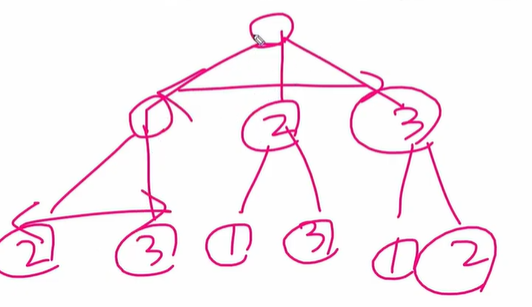

- 아이디어
    - 1부터 N중에 하나를 선택한뒤
    - 다음 1부터 N부터 선택할때 이미 선택한 값이 아닌경우 선택
    - M개를 선택할 경우 프린트

## 15649_N과M(1)

In [ ]:
"""
1.아이디어
- 백트래킹 재귀함수 안에서, for 돌면서 숫자 선택(이때 방문여부 확인)
- 재귀함수에서 M개를 선택할경우 Print

2. 시간복잡도
- N! > 가능

3. 자료구조
- 결과값 저장 int[]
- 방문여부 체크 : bool[]
"""
import sys
input = sys.stdin.readline

N,M = map(int,input().split())
rs = []
chk = [False] * (N+1)

def recur(num):
    if num == M:
        print(' '.join(map(str,rs)))
        return 
    for i in range(1, N+1):
        if chk[i] == False:
            chk[i] = True
            rs.append(i)
            recur(num+1)
            chk[i] = False
            rs.pop()
recur(0)